In [3]:
import numpy as np
import random
import math
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob
import torch
import torch.nn as nn
import torch.nn.functional as F
# import torchvision
# %matplotlib inline

from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [5]:
def drop_outlier(array,count,bins):
    index = []
    range_ = np.arange(1,count,bins)
    for i in range_[:-1]:
        array_lim = array[i:i+bins]
        sigma = np.std(array_lim)
        mean = np.mean(array_lim)
        th_max,th_min = mean + sigma*2, mean - sigma*2
        idx = np.where((array_lim < th_max) & (array_lim > th_min))
        idx = idx[0] + i
        index.extend(list(idx))
    return np.array(index)

In [6]:
import pandas as pd
import os
from glob import glob

folder_path = "CS2_35"
file_pattern = os.path.join(folder_path, "CS2_35_*.xlsx")
all_files = sorted(glob(file_pattern))

df_list = []

for file in all_files:
    try:
        df = pd.read_excel(file, sheet_name='Channel_1-008')  # Explicit sheet name
        print(f"Loaded {file} sheet: 'channel_1-1008'")
        df_list.append(df)
    except Exception as e:
        print(f"Failed to load {file}: {e}")


Channel_1-008
Info
Loaded CS2_35\CS2_35_10_15_10.xlsx sheet: 'channel_1-1008'
Channel_1-008
Info
Loaded CS2_35\CS2_35_10_22_10.xlsx sheet: 'channel_1-1008'
Channel_1-008
Info
Statistics_1-008
Loaded CS2_35\CS2_35_10_29_10.xlsx sheet: 'channel_1-1008'
Channel_1-008
Info
Statistics_1-008
Loaded CS2_35\CS2_35_11_01_10.xlsx sheet: 'channel_1-1008'
Channel_1-008
Info
Statistics_1-008
Loaded CS2_35\CS2_35_11_08_10.xlsx sheet: 'channel_1-1008'
Channel_1-008
Info
Statistics_1-008
Loaded CS2_35\CS2_35_11_23_10.xlsx sheet: 'channel_1-1008'
Channel_1-008
Info
Statistics_1-008
Loaded CS2_35\CS2_35_11_24_10.xlsx sheet: 'channel_1-1008'
Channel_1-008
Info
Statistics_1-008
Loaded CS2_35\CS2_35_12_06_10.xlsx sheet: 'channel_1-1008'
Channel_1-008
Info
Statistics_1-008
Loaded CS2_35\CS2_35_12_13_10.xlsx sheet: 'channel_1-1008'
Channel_1-008
Info
Statistics_1-008
Loaded CS2_35\CS2_35_12_20_10.xlsx sheet: 'channel_1-1008'
Channel_1-008
Info
Statistics_1-008
Loaded CS2_35\CS2_35_12_23_10.xlsx sheet: 'chann

In [7]:
for idx, df in enumerate(df_list):
    print(f"DataFrame {idx+1}:")
    display(df)  # This will render the DataFrame as a table in Jupyter
    print("\n" + "="*50 + "\n")

DataFrame 1:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000525,2010-10-08 14:29:45,30.000525,1,1,0.000000,3.424221,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
1,2,60.015702,2010-10-08 14:30:15,60.015703,1,1,0.000000,3.424382,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
2,3,90.030813,2010-10-08 14:30:45,90.030813,1,1,0.000000,3.424382,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
3,4,120.014345,2010-10-08 14:31:15,120.014346,1,1,0.000000,3.424382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,5,150.030510,2010-10-08 14:31:46,30.015733,2,1,0.550117,3.567489,0.004587,0.000000,0.016232,0.000000,0.001392,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17134,17135,588743.233662,2010-10-15 10:02:41,3234.635518,7,50,-1.099749,2.807921,50.996669,50.933312,203.268051,186.035823,-0.008839,0.095544,0,0,0
17135,17136,588751.718084,2010-10-15 10:02:49,3243.119940,7,50,-1.099388,2.699944,50.996669,50.935903,203.268051,186.042964,-0.010652,0.095544,0,0,0
17136,17137,588811.749538,2010-10-15 10:03:49,60.014861,8,50,0.000000,3.385044,50.996669,50.935903,203.268051,186.042964,0.001360,0.095544,0,0,0
17137,17138,588811.954479,2010-10-15 10:03:50,0.187419,9,50,-0.000019,3.385044,50.996669,50.935903,203.268051,186.042964,0.000000,0.093199,0,0,0




DataFrame 2:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.015167,2010-10-15 17:12:56,30.015168,1,1,0.000000,3.661383,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
1,2,60.030199,2010-10-15 17:13:26,60.030200,1,1,0.000000,3.661221,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
2,3,90.045337,2010-10-15 17:13:56,90.045338,1,1,0.000000,3.661383,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
3,4,120.013387,2010-10-15 17:14:26,120.013388,1,1,0.000000,3.661383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,5,150.032289,2010-10-15 17:14:56,30.018496,2,1,0.550117,3.770170,0.004587,0.000000,0.017229,0.000000,0.000615,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16624,16625,581189.156713,2010-10-22 10:39:56,3174.433409,7,50,-1.099568,2.795618,49.618505,49.618703,198.248131,180.819186,-0.008807,0.097251,0,0,0
16625,16626,581196.922089,2010-10-22 10:40:04,3182.198785,7,50,-1.099568,2.699620,49.618505,49.621074,198.248131,180.825706,-0.010199,0.097251,0,0,0
16626,16627,581256.908101,2010-10-22 10:41:04,60.014655,8,50,0.000000,3.384882,49.618505,49.621074,198.248131,180.825706,0.001360,0.097251,0,0,0
16627,16628,581257.083644,2010-10-22 10:41:05,0.187588,9,50,-0.000019,3.384882,49.618505,49.621074,198.248131,180.825706,0.000000,0.092472,0,0,0




DataFrame 3:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000811,2010-10-22 13:23:55,29.937560,1,1,0.000000,3.652156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,2,60.015964,2010-10-22 13:24:25,59.952712,1,1,0.000000,3.651994,0.000000,0.000000,0.000000,0.000000,-0.000065,0.000000,0,0,0
2,3,90.031235,2010-10-22 13:24:55,89.967984,1,1,0.000000,3.652318,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
3,4,120.046188,2010-10-22 13:25:25,119.982937,1,1,0.000000,3.652318,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
4,5,120.077410,2010-10-22 13:25:25,120.014159,1,1,0.000000,3.652479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16329,16330,573511.148060,2010-10-29 04:42:59,3145.761612,7,50,-1.099568,2.816339,48.784715,48.786197,195.026387,177.568651,-0.008515,0.097885,0,0,0
16330,16331,573520.757252,2010-10-29 04:43:08,3155.370803,7,50,-1.099568,2.699944,48.784715,48.789132,195.026387,177.576751,-0.010134,0.097885,0,0,0
16331,16332,573580.788539,2010-10-29 04:44:09,60.014650,8,50,0.000000,3.368694,48.784715,48.789132,195.026387,177.576751,0.001263,0.097885,0,0,0
16332,16333,573580.993902,2010-10-29 04:44:09,0.187757,9,50,-0.000019,3.368855,48.784715,48.789132,195.026387,177.576751,0.000000,0.093925,0,0,0




DataFrame 4:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.001254,2010-10-29 09:58:03,29.937719,1,1,0.000000,3.652156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,2,60.016399,2010-10-29 09:58:33,59.952864,1,1,0.000000,3.652156,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
2,3,90.032307,2010-10-29 09:59:03,89.968773,1,1,0.000000,3.652318,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
3,4,120.046711,2010-10-29 09:59:34,119.983176,1,1,0.000000,3.652318,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
4,5,120.077975,2010-10-29 09:59:34,120.014440,1,1,0.000000,3.652156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,3244,114891.069610,2010-10-30 17:52:37,2911.473389,7,10,-1.099749,3.458055,9.740266,9.664008,38.968077,35.199542,-0.000324,0.095544,0,0,0
3244,3245,114921.084822,2010-10-30 17:53:07,2941.488601,7,10,-1.099568,3.445751,9.740266,9.673177,38.968077,35.231193,-0.000389,0.095544,0,0,0
3245,3246,114951.099990,2010-10-30 17:53:37,2971.503770,7,10,-1.099568,3.430534,9.740266,9.682345,38.968077,35.262717,-0.000486,0.095544,0,0,0
3246,3247,114981.115190,2010-10-30 17:54:07,3001.518970,7,10,-1.099568,3.411593,9.740266,9.691513,38.968077,35.294085,-0.000550,0.095544,0,0,0




DataFrame 5:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000460,2010-11-01 14:23:58,30.000461,1,1,0.000000,3.702016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,2,60.015773,2010-11-01 14:24:28,60.015774,1,1,0.000000,3.702016,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
2,3,90.030864,2010-11-01 14:24:58,90.030864,1,1,0.000000,3.702016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
3,4,120.014324,2010-11-01 14:25:28,120.014325,1,1,0.000000,3.702016,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
4,5,150.015114,2010-11-01 14:25:58,30.000352,2,1,0.550297,3.792511,0.004585,0.000000,0.017353,0.000000,0.000324,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,16502,574217.127651,2010-11-08 05:54:44,3198.387427,7,50,-1.099568,2.716618,49.097135,49.159069,196.005082,179.370401,-0.010782,0.094094,0,0,0
16502,16503,574218.346396,2010-11-08 05:54:45,3199.606172,7,50,-1.099930,2.699782,49.097135,49.159441,196.005082,179.371409,-0.010911,0.094094,0,0,0
16503,16504,574278.387007,2010-11-08 05:55:46,60.015116,8,50,0.000000,3.314786,49.097135,49.159441,196.005082,179.371409,0.001166,0.094094,0,0,0
16504,16505,574278.600528,2010-11-08 05:55:46,0.187504,9,50,-0.000019,3.315271,49.097135,49.159441,196.005082,179.371409,0.000000,0.094734,0,0,0




DataFrame 6:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000987,2010-11-16 11:45:27,30.000988,1,1,0.000000,3.695217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,2,60.016142,2010-11-16 11:45:57,60.016143,1,1,0.000000,3.695217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
2,3,90.031419,2010-11-16 11:46:27,90.031420,1,1,0.000000,3.695217,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
3,4,120.015334,2010-11-16 11:46:57,120.015335,1,1,0.000000,3.695217,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
4,5,150.031300,2010-11-16 11:47:27,30.015546,2,1,0.550117,3.785064,0.004587,0.000000,0.017327,0.000000,0.000291,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16428,16429,571594.906088,2010-11-23 02:32:30,3148.500374,7,50,-1.099749,2.873647,48.942802,48.954317,195.398317,178.540443,-0.008094,0.096093,0,0,0
16429,16430,571608.921574,2010-11-23 02:32:44,3162.515860,7,50,-1.099749,2.699944,48.942802,48.958599,195.398317,178.552388,-0.010490,0.096093,0,0,0
16430,16431,571668.956857,2010-11-23 02:33:44,60.015036,8,50,0.000000,3.326280,48.942802,48.958599,195.398317,178.552388,0.001230,0.096093,0,0,0
16431,16432,571669.118309,2010-11-23 02:33:45,0.187485,9,50,-0.000019,3.326603,48.942802,48.958599,195.398317,178.552388,0.000000,0.093031,0,0,0




DataFrame 7:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000660,2010-11-23 12:25:25,30.000661,1,1,0.000000,3.640662,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
1,2,60.015810,2010-11-23 12:25:55,60.015811,1,1,0.000000,3.640824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
2,3,90.031172,2010-11-23 12:26:25,90.031173,1,1,0.000000,3.640824,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
3,4,120.014955,2010-11-23 12:26:55,120.014956,1,1,0.000000,3.640824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,5,150.030246,2010-11-23 12:27:26,30.014873,2,1,0.550117,3.760619,0.004587,0.000000,0.017172,0.000000,0.000745,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,2692,95918.020141,2010-11-24 15:03:43,4202.103755,2,9,0.550297,4.089571,8.310259,7.655376,33.252459,27.772571,0.000065,0.096441,0,0,0
2692,2693,95948.035437,2010-11-24 15:04:13,4232.119050,2,9,0.550117,4.092161,8.314845,7.655376,33.271221,27.772571,0.000065,0.096441,0,0,0
2693,2694,95978.050837,2010-11-24 15:04:43,4262.134451,2,9,0.550117,4.095237,8.319432,7.655376,33.289997,27.772571,0.000065,0.096441,0,0,0
2694,2695,96008.065897,2010-11-24 15:05:13,4292.149510,2,9,0.550117,4.097989,8.324018,7.655376,33.308785,27.772571,0.000065,0.096441,0,0,0




DataFrame 8:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000261,2010-11-29 10:34:08,30.000262,1,1,0.000000,3.961357,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
1,2,60.017138,2010-11-29 10:34:38,60.017139,1,1,0.000000,3.961357,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
2,3,90.030640,2010-11-29 10:35:08,90.030640,1,1,0.000000,3.961357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
3,4,120.015360,2010-11-29 10:35:38,120.015361,1,1,0.000000,3.961357,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
4,5,150.031529,2010-11-29 10:36:08,30.015737,2,1,0.550117,4.059298,0.004587,0.000000,0.018569,0.000000,0.000486,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15423,15424,553556.568215,2010-12-05 20:20:38,3052.601989,7,50,-1.099749,2.778944,46.066600,46.729314,184.573237,169.552333,-0.009098,0.096988,0,0,0
15424,15425,553563.255587,2010-12-05 20:20:45,3059.289361,7,50,-1.099749,2.699782,46.066600,46.731357,184.573237,169.557929,-0.009519,0.096988,0,0,0
15425,15426,553623.291895,2010-12-05 20:21:45,60.015000,8,50,0.000000,3.359142,46.066600,46.731357,184.573237,169.557929,0.001327,0.096988,0,0,0
15426,15427,553623.499258,2010-12-05 20:21:45,0.185437,9,50,-0.000019,3.359142,46.066600,46.731357,184.573237,169.557929,0.000000,0.092389,0,0,0




DataFrame 9:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000847,2010-12-06 12:33:56,30.000848,1,1,0.000000,3.673039,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
1,2,60.015568,2010-12-06 12:34:26,60.015569,1,1,0.000000,3.673039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
2,3,90.030476,2010-12-06 12:34:56,90.030477,1,1,0.000000,3.672877,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
3,4,120.013940,2010-12-06 12:35:26,120.013940,1,1,0.000000,3.673039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,5,150.029863,2010-12-06 12:35:56,30.015345,2,1,0.550117,3.781664,0.004587,0.000000,0.017286,0.000000,0.000518,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15181,15182,550794.223377,2010-12-12 21:34:24,2964.855545,7,50,-1.099749,2.796266,45.544541,45.525560,182.666406,165.008254,-0.008321,0.095544,0,0,0
15182,15183,550803.113698,2010-12-12 21:34:33,2973.745866,7,50,-1.099749,2.699944,45.544541,45.528276,182.666406,165.015718,-0.008709,0.095544,0,0,0
15183,15184,550863.103705,2010-12-12 21:35:33,60.014704,8,50,0.000000,3.383911,45.544541,45.528276,182.666406,165.015718,0.001392,0.095544,0,0,0
15184,15185,550863.314300,2010-12-12 21:35:34,0.187507,9,50,-0.000019,3.383911,45.544541,45.528276,182.666406,165.015718,-0.000097,0.094563,0,0,0




DataFrame 10:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000398,2010-12-13 12:36:53,30.000398,1,1,0.000000,3.688580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,2,60.017136,2010-12-13 12:37:23,60.017137,1,1,0.000000,3.688580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
2,3,90.030330,2010-12-13 12:37:53,90.030330,1,1,0.000000,3.688580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
3,4,120.015534,2010-12-13 12:38:23,120.015534,1,1,0.000000,3.688580,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
4,5,150.031324,2010-12-13 12:38:53,30.015379,2,1,0.550297,3.796881,0.004587,0.000000,0.017367,0.000000,0.000453,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14653,14654,536155.387638,2010-12-19 17:33:22,2877.778357,7,50,-1.099568,2.806950,43.960281,43.927923,176.502948,158.924193,-0.007253,0.096354,0,0,0
14654,14655,536166.746826,2010-12-19 17:33:33,2889.137545,7,50,-1.099930,2.699458,43.960281,43.931393,176.502948,158.933748,-0.007641,0.096354,0,0,0
14655,14656,536226.780347,2010-12-19 17:34:33,60.014616,8,50,0.000000,3.408032,43.960281,43.931393,176.502948,158.933748,0.001360,0.096354,0,0,0
14656,14657,536226.940977,2010-12-19 17:34:34,0.187611,9,50,-0.000019,3.408356,43.960281,43.931393,176.502948,158.933748,-0.000032,0.094734,0,0,0




DataFrame 11:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000397,2010-12-20 12:10:10,30.000398,1,1,0.000000,3.694731,0.000000,0.00000,0.000000,0.000000,0.000032,0.000000,0,0,0
1,2,60.015459,2010-12-20 12:10:40,60.015460,1,1,0.000000,3.694731,0.000000,0.00000,0.000000,0.000000,0.000032,0.000000,0,0,0
2,3,90.030686,2010-12-20 12:11:10,90.030687,1,1,0.000000,3.694570,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0,0,0
3,4,120.013903,2010-12-20 12:11:40,120.013904,1,1,0.000000,3.694570,0.000000,0.00000,0.000000,0.000000,-0.000032,0.000000,0,0,0
4,5,150.026609,2010-12-20 12:12:10,30.012289,2,1,0.550297,3.789920,0.004587,0.00000,0.017341,0.000000,0.000421,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7182,7183,259726.732965,2010-12-23 12:18:57,517.755957,4,25,0.306113,4.199815,21.690751,20.89162,87.061221,75.688979,0.000000,0.097076,0,0,0
7183,7184,259903.151533,2010-12-23 12:21:54,694.174524,4,25,0.256085,4.199653,21.704507,20.89162,87.118990,75.688979,-0.000032,0.097076,0,0,0
7184,7185,260119.850615,2010-12-23 12:25:30,910.873606,4,25,0.206056,4.199653,21.718374,20.89162,87.177230,75.688979,0.000000,0.097076,0,0,0
7185,7186,260406.704631,2010-12-23 12:30:17,1197.727622,4,25,0.156027,4.199653,21.732717,20.89162,87.237466,75.688979,-0.000032,0.097076,0,0,0




DataFrame 12:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000510,2011-01-03 10:38:25,30.000510,1,1,0.000000,4.138784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,2,60.015841,2011-01-03 10:38:55,60.015842,1,1,0.000000,4.138946,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
2,3,90.030968,2011-01-03 10:39:25,90.030968,1,1,0.000000,4.138622,0.000000,0.000000,0.000000,0.000000,-0.000065,0.000000,0,0,0
3,4,120.014381,2011-01-03 10:39:55,120.014381,1,1,0.000000,4.138946,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
4,5,120.121722,2011-01-03 10:39:55,0.106845,2,1,0.550117,4.200301,0.000016,0.000000,0.000069,0.000000,0.000550,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12690,12691,487973.462535,2011-01-09 02:11:50,2428.944736,7,50,-1.099749,2.868143,38.055034,38.780428,153.762995,138.965500,-0.005018,0.102299,0,0,0
12691,12692,487996.649656,2011-01-09 02:12:13,2452.131858,7,50,-1.099388,2.699944,38.055034,38.787511,153.762995,138.985234,-0.006087,0.102299,0,0,0
12692,12693,488056.678814,2011-01-09 02:13:13,60.014647,8,50,0.000000,3.545635,38.055034,38.787511,153.762995,138.985234,0.001327,0.102299,0,0,0
12693,12694,488056.882008,2011-01-09 02:13:14,0.187698,9,50,-0.000019,3.545797,38.055034,38.787511,153.762995,138.985234,-0.000065,0.101212,0,0,0




DataFrame 13:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000557,2011-01-10 11:47:49,30.000557,1,1,0.000000,3.749611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,2,60.015685,2011-01-10 11:48:19,60.015686,1,1,0.000000,3.749611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
2,3,90.030840,2011-01-10 11:48:49,90.030840,1,1,0.000000,3.749773,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
3,4,120.014263,2011-01-10 11:49:19,120.014264,1,1,0.000000,3.749611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,5,150.030283,2011-01-10 11:49:49,30.015612,2,1,0.550117,3.845447,0.004587,0.000000,0.017592,0.000000,0.000453,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11653,11654,451642.447173,2011-01-15 17:15:43,2179.056736,7,50,-1.099568,2.883036,35.152864,35.074281,142.473106,124.834679,-0.004436,0.108499,0,0,0
11654,11655,451670.509191,2011-01-15 17:16:11,2207.118754,7,50,-1.099749,2.699782,35.152864,35.082852,142.473106,124.858631,-0.005569,0.108499,0,0,0
11655,11656,451730.525560,2011-01-15 17:17:11,60.014761,8,50,0.000000,3.582383,35.152864,35.082852,142.473106,124.858631,0.001327,0.108499,0,0,0
11656,11657,451730.699824,2011-01-15 17:17:11,0.187419,9,50,-0.000019,3.582383,35.152864,35.082852,142.473106,124.858631,0.000000,0.105165,0,0,0




DataFrame 14:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000639,2011-01-18 13:17:53,30.000640,1,1,0.000000,3.777779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,2,60.015760,2011-01-18 13:18:23,60.015760,1,1,0.000000,3.777779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
2,3,90.030871,2011-01-18 13:18:53,90.030872,1,1,0.000000,3.777779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
3,4,120.014316,2011-01-18 13:19:23,120.014317,1,1,0.000000,3.777941,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
4,5,150.030146,2011-01-18 13:19:53,30.015414,2,1,0.550117,3.879119,0.004587,0.000000,0.017746,0.000000,0.000421,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,10223,429079.036130,2011-01-23 12:29:42,1998.108273,7,50,-1.099388,2.722122,31.367660,31.296558,128.006670,110.103576,-0.005666,0.110928,0,0,0
10223,10224,429082.098584,2011-01-23 12:29:45,2001.170727,7,50,-1.099749,2.699944,31.367660,31.297493,128.006670,110.106112,-0.005763,0.110928,0,0,0
10224,10225,429142.113638,2011-01-23 12:30:45,60.014626,8,50,0.000000,3.604885,31.367660,31.297493,128.006670,110.106112,0.001392,0.110928,0,0,0
10225,10226,429142.287121,2011-01-23 12:30:46,0.187700,9,50,-0.000019,3.604885,31.367660,31.297493,128.006670,110.106112,-0.000065,0.106880,0,0,0




DataFrame 15:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000546,2011-01-24 10:54:44,30.000547,1,1,0.000000,3.791863,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
1,2,60.015684,2011-01-24 10:55:14,60.015685,1,1,0.000000,3.791863,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
2,3,90.030816,2011-01-24 10:55:44,90.030817,1,1,0.000000,3.792025,0.000000,0.000000,0.000000,0.000000,0.000065,0.000000,0,0,0
3,4,120.015516,2011-01-24 10:56:14,120.015517,1,1,0.000000,3.791863,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
4,5,150.031351,2011-01-24 10:56:44,30.015398,2,1,0.550297,3.899193,0.004586,0.000000,0.017836,0.000000,0.000453,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,6390,286263.855731,2011-01-27 18:26:02,361.118969,4,37,0.394431,4.199815,19.930983,19.455145,81.789804,67.436097,0.000000,0.114477,0,0,0
6390,6391,286430.509142,2011-01-27 18:28:49,527.772379,4,37,0.344403,4.199653,19.948060,19.455145,81.861527,67.436097,-0.000032,0.114477,0,0,0
6391,6392,286633.786670,2011-01-27 18:32:12,731.049908,4,37,0.294374,4.199653,19.966065,19.455145,81.937141,67.436097,-0.000032,0.114477,0,0,0
6392,6393,286882.844922,2011-01-27 18:36:21,980.108159,4,37,0.244345,4.199653,19.984661,19.455145,82.015244,67.436097,-0.000032,0.114477,0,0,0




DataFrame 16:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000393,2011-01-31 10:51:35,30.000393,1,1,0.000000,4.116930,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
1,2,60.015482,2011-01-31 10:52:05,60.015482,1,1,0.000000,4.117091,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
2,3,90.030710,2011-01-31 10:52:35,90.030711,1,1,0.000000,4.116930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
3,4,120.013823,2011-01-31 10:53:05,120.013824,1,1,0.000000,4.116930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,5,120.170526,2011-01-31 10:53:05,0.156275,2,1,0.549755,4.200301,0.000024,0.000000,0.000100,0.000000,0.002299,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978,5979,285436.015824,2011-02-03 18:09:19,967.358471,7,50,-1.099568,2.791571,17.849891,18.105424,73.791100,61.188585,-0.002558,0.122962,0,0,0
5979,5980,285462.796842,2011-02-03 18:09:46,994.139490,7,50,-1.099749,2.699944,17.849891,18.113604,73.791100,61.211053,-0.002882,0.122962,0,0,0
5980,5981,285522.819144,2011-02-03 18:10:46,60.014758,8,50,0.000000,3.774865,17.849891,18.113604,73.791100,61.211053,0.000680,0.122962,0,0,0
5981,5982,285523.015167,2011-02-03 18:10:46,0.187382,9,50,-0.000019,3.775027,17.849891,18.113604,73.791100,61.211053,0.000000,0.123185,0,0,0




DataFrame 17:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000393,2011-01-31 10:51:35,30.000393,1,1,0.000000,4.116930,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
1,2,60.015482,2011-01-31 10:52:05,60.015482,1,1,0.000000,4.117091,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
2,3,90.030710,2011-01-31 10:52:35,90.030711,1,1,0.000000,4.116930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
3,4,120.013823,2011-01-31 10:53:05,120.013824,1,1,0.000000,4.116930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,5,120.170526,2011-01-31 10:53:05,0.156275,2,1,0.549755,4.200301,0.000024,0.000000,0.000100,0.000000,0.002299,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978,5979,285436.015824,2011-02-03 18:09:19,967.358471,7,50,-1.099568,2.791571,17.849891,18.105424,73.791100,61.188585,-0.002558,0.122962,0,0,0
5979,5980,285462.796842,2011-02-03 18:09:46,994.139490,7,50,-1.099749,2.699944,17.849891,18.113604,73.791100,61.211053,-0.002882,0.122962,0,0,0
5980,5981,285522.819144,2011-02-03 18:10:46,60.014758,8,50,0.000000,3.774865,17.849891,18.113604,73.791100,61.211053,0.000680,0.122962,0,0,0
5981,5982,285523.015167,2011-02-03 18:10:46,0.187382,9,50,-0.000019,3.775027,17.849891,18.113604,73.791100,61.211053,0.000000,0.123185,0,0,0




DataFrame 18:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,10.000849,2010-08-16 13:44:57,9.936800,1,1,0.000000,3.412241,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
1,2,20.001270,2010-08-16 13:45:07,19.937222,1,1,0.000000,3.412403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
2,3,30.019406,2010-08-16 13:45:17,29.955358,1,1,0.000000,3.412241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
3,4,40.032179,2010-08-16 13:45:27,39.968131,1,1,0.000000,3.412403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,5,50.048148,2010-08-16 13:45:37,49.984100,1,1,0.000000,3.412403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,1087,13086.092300,2010-08-16 17:22:54,3723.507838,7,1,-1.099749,2.755147,1.158338,1.137453,4.620184,4.156767,-0.011235,0.093199,0,0,0
1087,1088,13089.389107,2010-08-16 17:22:57,3726.804645,7,1,-1.099749,2.699944,1.158338,1.138460,4.620184,4.159515,-0.013177,0.093199,0,0,0
1088,1089,13149.404103,2010-08-16 17:23:57,60.014836,8,1,0.000000,3.259745,1.158338,1.138460,4.620184,4.159515,0.001295,0.093199,0,0,0
1089,1090,13149.592629,2010-08-16 17:23:58,0.187636,9,1,-0.000019,3.259907,1.158338,1.138460,4.620184,4.159515,0.000000,0.089147,0,0,0




DataFrame 19:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000929,2010-08-17 14:30:57,29.937579,1,1,0.000000,3.525237,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
1,2,60.016133,2010-08-17 14:31:27,59.952783,1,1,0.000000,3.525237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
2,3,90.031316,2010-08-17 14:31:57,89.967966,1,1,0.000000,3.525237,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
3,4,120.046902,2010-08-17 14:32:27,119.983551,1,1,0.000000,3.525237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,5,120.077803,2010-08-17 14:32:27,120.014453,1,1,0.000000,3.525237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,379,12917.174283,2010-08-17 18:05:45,3717.476641,7,1,-1.099749,2.812454,1.138645,1.135542,4.535276,4.154282,-0.009292,0.094009,0,0,0
379,380,12924.330189,2010-08-17 18:05:52,3724.632547,7,1,-1.099568,2.699944,1.138645,1.137728,4.535276,4.160314,-0.013598,0.094009,0,0,0
380,381,12984.344984,2010-08-17 18:06:52,60.014866,8,1,0.000000,3.254564,1.138645,1.137728,4.535276,4.160314,0.001230,0.094009,0,0,0
381,382,12984.533279,2010-08-17 18:06:52,0.187491,9,1,-0.000019,3.254726,1.138645,1.137728,4.535276,4.160314,0.000000,0.088336,0,0,0




DataFrame 20:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000173,2010-08-18 10:59:23,29.936572,1,1,0.000000,3.519085,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
1,2,60.015247,2010-08-18 10:59:53,59.951645,1,1,0.000000,3.519247,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
2,3,90.030405,2010-08-18 11:00:24,89.966803,1,1,0.000000,3.519085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
3,4,120.045902,2010-08-18 11:00:54,119.982301,1,1,0.000000,3.519085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,5,120.076825,2010-08-18 11:00:54,120.013224,1,1,0.000000,3.518924,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,379,12896.406519,2010-08-18 14:33:51,3716.898152,7,1,-1.099749,2.813587,1.137456,1.135333,4.528260,4.156061,-0.009454,0.091661,0,0,0
379,380,12903.437653,2010-08-18 14:33:58,3723.929286,7,1,-1.099568,2.699944,1.137456,1.137481,4.528260,4.161989,-0.013987,0.091661,0,0,0
380,381,12963.453035,2010-08-18 14:34:58,60.014499,8,1,0.000000,3.250355,1.137456,1.137481,4.528260,4.161989,0.001230,0.091661,0,0,0
381,382,12963.643857,2010-08-18 14:34:58,0.190048,9,1,-0.000019,3.250355,1.137456,1.137481,4.528260,4.161989,0.000000,0.089795,0,0,0




DataFrame 21:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000576,2010-08-19 14:21:41,30.000576,1,1,0.000000,3.511962,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
1,2,60.015454,2010-08-19 14:22:11,60.015455,1,1,0.000000,3.512286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
2,3,90.030626,2010-08-19 14:22:41,90.030626,1,1,0.000000,3.512286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
3,4,120.014558,2010-08-19 14:23:11,120.014558,1,1,0.000000,3.512286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,5,150.030067,2010-08-19 14:23:41,30.015083,2,1,0.550117,3.627711,0.004587,0.000000,0.016540,0.000000,0.001036,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18408,18409,615768.728718,2010-08-26 17:25:00,3432.385305,7,50,-1.099388,2.710304,54.338302,54.264007,215.818688,199.312783,-0.012789,0.089876,0,0,0
18409,18410,615769.369324,2010-08-26 17:25:01,3433.025911,7,50,-1.099749,2.699944,54.338302,54.264202,215.818688,199.313312,-0.012854,0.089876,0,0,0
18410,18411,615829.410184,2010-08-26 17:26:01,60.014714,8,50,0.000000,3.431344,54.338302,54.264202,215.818688,199.313312,0.001166,0.089876,0,0,0
18411,18412,615829.577985,2010-08-26 17:26:01,0.187628,9,50,-0.000019,3.431667,54.338302,54.264202,215.818688,199.313312,0.000000,0.084361,0,0,0




DataFrame 22:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000735,2010-09-14 13:57:43,30.000735,1,1,0.000000,3.725490,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
1,2,60.016012,2010-09-14 13:58:13,60.016012,1,1,0.000000,3.725490,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
2,3,90.031281,2010-09-14 13:58:43,90.031281,1,1,0.000000,3.725490,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
3,4,120.015006,2010-09-14 13:59:13,120.015006,1,1,0.000000,3.725490,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
4,5,150.030913,2010-09-14 13:59:43,30.015479,2,1,0.550117,3.810156,0.004587,0.000000,0.017436,0.000000,0.000389,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17309,17310,587328.312133,2010-09-21 09:07:01,3264.350911,7,50,-1.099568,2.852926,51.187666,51.318848,203.828789,187.912537,-0.009778,0.093115,0,0,0
17310,17311,587338.390273,2010-09-21 09:07:11,3274.429050,7,50,-1.099568,2.699782,51.187666,51.321926,203.828789,187.921092,-0.012886,0.093115,0,0,0
17311,17312,587398.389156,2010-09-21 09:08:11,60.014944,8,50,0.000000,3.406899,51.187666,51.321926,203.828789,187.921092,0.001489,0.093115,0,0,0
17312,17313,587398.561365,2010-09-21 09:08:11,0.187457,9,50,-0.000019,3.407061,51.187666,51.321926,203.828789,187.921092,0.000000,0.089147,0,0,0




DataFrame 23:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000715,2010-09-21 15:48:03,30.000716,1,1,0.000000,3.671258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,2,60.015994,2010-09-21 15:48:33,60.015994,1,1,0.000000,3.671258,0.000000,0.000000,0.000000,0.000000,-0.000032,0.000000,0,0,0
2,3,90.031236,2010-09-21 15:49:03,90.031237,1,1,0.000000,3.671258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
3,4,120.015381,2010-09-21 15:49:33,120.015381,1,1,0.000000,3.671420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,5,150.031369,2010-09-21 15:50:03,30.015576,2,1,0.550117,3.769846,0.004587,0.000000,0.017234,0.000000,0.000550,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16956,16957,574828.580178,2010-09-28 07:29:00,3261.009733,7,50,-1.099749,2.811483,50.104025,50.142961,199.588963,183.576663,-0.010911,0.093925,0,0,0
16957,16958,574835.580095,2010-09-28 07:29:07,3268.009650,7,50,-1.099749,2.699620,50.104025,50.145099,199.588963,183.582558,-0.013177,0.093925,0,0,0
16958,16959,574895.572896,2010-09-28 07:30:07,60.014949,8,50,0.000000,3.360114,50.104025,50.145099,199.588963,183.582558,0.001425,0.093925,0,0,0
16959,16960,574895.753789,2010-09-28 07:30:07,0.186767,9,50,0.000703,3.360923,50.104025,50.145099,199.588963,183.582558,0.000000,0.089228,0,0,0




DataFrame 24:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000477,2010-08-31 13:30:15,30.000478,1,1,0.000000,3.689389,0.000000,0.000000,0.000000,0.00000,-0.000032,0.000000,0,0,0
1,2,60.015651,2010-08-31 13:30:45,60.015652,1,1,0.000000,3.689389,0.000000,0.000000,0.000000,0.00000,0.000032,0.000000,0,0,0
2,3,90.030981,2010-08-31 13:31:15,90.030982,1,1,0.000000,3.689389,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0
3,4,120.014147,2010-08-31 13:31:45,120.014147,1,1,0.000000,3.689389,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0
4,5,150.014690,2010-08-31 13:32:15,30.000126,2,1,0.550117,3.771465,0.004584,0.000000,0.017254,0.00000,0.000324,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,15631,530365.712262,2010-09-06 16:50:06,1710.863046,2,45,0.550297,3.901298,46.374074,46.078954,184.594783,168.61384,0.000032,0.088257,0,0,0
15631,15632,530395.727390,2010-09-06 16:50:36,1740.878175,2,45,0.550297,3.902431,46.378661,46.078954,184.612678,168.61384,0.000032,0.088257,0,0,0
15632,15633,530425.742344,2010-09-06 16:51:06,1770.893129,2,45,0.550117,3.903240,46.383247,46.078954,184.630577,168.61384,-0.000032,0.088257,0,0,0
15633,15634,530455.756815,2010-09-06 16:51:36,1800.907600,2,45,0.549936,3.904374,46.387571,46.078954,184.647458,168.61384,0.000032,0.088257,0,0,0




DataFrame 25:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000557,2010-09-07 10:44:17,30.000557,1,1,0.000000,3.790244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,2,60.015781,2010-09-07 10:44:47,60.015781,1,1,0.000000,3.790082,0.000000,0.000000,0.000000,0.000000,-0.000065,0.000000,0,0,0
2,3,90.031038,2010-09-07 10:45:17,90.031039,1,1,0.000000,3.790082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
3,4,120.014352,2010-09-07 10:45:47,120.014353,1,1,0.000000,3.790244,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
4,5,150.014995,2010-09-07 10:46:17,30.000210,2,1,0.550297,3.874587,0.004585,0.000000,0.017725,0.000000,0.000389,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2346,80602.391928,2010-09-08 09:07:17,2881.449956,7,7,-1.099568,3.502897,6.908082,7.055547,27.570612,25.856896,-0.000130,0.092305,0,0,0
2346,2347,80632.407308,2010-09-08 09:07:47,2911.465336,7,7,-1.099388,3.497069,6.908082,7.064715,27.570612,25.888982,-0.000130,0.092305,0,0,0
2347,2348,80662.422450,2010-09-08 09:08:17,2941.480478,7,7,-1.099568,3.490756,6.908082,7.073883,27.570612,25.921014,-0.000194,0.092305,0,0,0
2348,2349,80692.437586,2010-09-08 09:08:47,2971.495614,7,7,-1.099568,3.484118,6.908082,7.083050,27.570612,25.952988,-0.000227,0.092305,0,0,0


In [8]:
# # List of columns to remove
# columns_to_remove = ['Data_Point', 'Test_Time(s)', 'Date_Time', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Is_FC_Data']

# # Iterate over the list of DataFrames and remove the unnecessary columns
# for idx, df in enumerate(df_list):
#     # Drop the unnecessary columns if they exist in the DataFrame
#     df_cleaned = df.drop(columns=[col for col in columns_to_remove if col in df.columns])
    
#     # Display the cleaned DataFrame
#     print(f"DataFrame {idx+1} (Cleaned):")
#     display(df_cleaned)  # This will render the cleaned DataFrame as a table in Jupyter
#     print("\n" + "="*50 + "\n")
    
#     # Optionally, replace the original dataframe in df_list with the cleaned one
#     df_list[idx] = df_cleaned


In [9]:
for idx, df in enumerate(df_list):
    missing_count = df.isnull().sum().sum()  # Total missing values across the entire DataFrame
    print(f"DataFrame {idx+1}: {missing_count} missing values.")

DataFrame 1: 0 missing values.
DataFrame 2: 0 missing values.
DataFrame 3: 0 missing values.
DataFrame 4: 0 missing values.
DataFrame 5: 0 missing values.
DataFrame 6: 0 missing values.
DataFrame 7: 0 missing values.
DataFrame 8: 0 missing values.
DataFrame 9: 0 missing values.
DataFrame 10: 0 missing values.
DataFrame 11: 0 missing values.
DataFrame 12: 0 missing values.
DataFrame 13: 0 missing values.
DataFrame 14: 0 missing values.
DataFrame 15: 0 missing values.
DataFrame 16: 0 missing values.
DataFrame 17: 0 missing values.
DataFrame 18: 0 missing values.
DataFrame 19: 0 missing values.
DataFrame 20: 0 missing values.
DataFrame 21: 0 missing values.
DataFrame 22: 0 missing values.
DataFrame 23: 0 missing values.
DataFrame 24: 0 missing values.
DataFrame 25: 0 missing values.


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to scale (e.g., 'Voltage', 'Current', 'Charge Capacity', etc.)
columns_to_scale = ['Voltage(V)', 'Current(A)', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)',
                    'Charge_Energy(Wh)', 'Discharge_Energy(Wh)', 'Internal_Resistance(Ohm)', 'dV/dt(V/s)', 
                    'AC_Impedance(Ohm)', 'ACI_Phase_Angle(Deg)']

scaler = MinMaxScaler()  # Using MinMaxScaler for scaling features to a range [0, 1]

for idx, df in enumerate(df_list):
    # Fit the scaler and transform the relevant columns to scale them
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    print(f"DataFrame {idx+1}: Features scaled.")


DataFrame 1: Features scaled.
DataFrame 2: Features scaled.
DataFrame 3: Features scaled.
DataFrame 4: Features scaled.
DataFrame 5: Features scaled.
DataFrame 6: Features scaled.
DataFrame 7: Features scaled.
DataFrame 8: Features scaled.
DataFrame 9: Features scaled.
DataFrame 10: Features scaled.
DataFrame 11: Features scaled.
DataFrame 12: Features scaled.
DataFrame 13: Features scaled.
DataFrame 14: Features scaled.
DataFrame 15: Features scaled.
DataFrame 16: Features scaled.
DataFrame 17: Features scaled.
DataFrame 18: Features scaled.
DataFrame 19: Features scaled.
DataFrame 20: Features scaled.
DataFrame 21: Features scaled.
DataFrame 22: Features scaled.
DataFrame 23: Features scaled.
DataFrame 24: Features scaled.
DataFrame 25: Features scaled.


In [11]:
from IPython.display import display

# Assuming df_list is already available and MinMaxScaler was applied

# Display DataFrame 1 after scaling in a table format
print("DataFrame 1 after scaling:")
display(df_list[0].head())  # This will display the first few rows of DataFrame 1 as a table


DataFrame 1 after scaling:


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000525,2010-10-08 14:29:45,30.000525,1,1,0.520293,0.482956,0.00000,0.0,0.00000,0.0,0.889546,0.0,0,0.0,0.0
1,2,60.015702,2010-10-08 14:30:15,60.015703,1,1,0.520293,0.483064,0.00000,0.0,0.00000,0.0,0.889546,0.0,0,0.0,0.0
2,3,90.030813,2010-10-08 14:30:45,90.030813,1,1,0.520293,0.483064,0.00000,0.0,0.00000,0.0,0.889546,0.0,0,0.0,0.0
3,4,120.014345,2010-10-08 14:31:15,120.014346,1,1,0.520293,0.483064,0.00000,0.0,0.00000,0.0,0.887574,0.0,0,0.0,0.0
4,5,150.030510,2010-10-08 14:31:46,30.015733,2,1,0.780425,0.578425,0.00009,0.0,0.00008,0.0,0.972387,0.0,0,0.0,0.0


In [12]:
import numpy as np

# Set the number of timesteps for the sequences
timesteps = 67

# Prepare reshaped data and store in a separate list
reshaped_data_list = []

# Loop through each DataFrame and reshape the data
for idx, df in enumerate(df_list):
    voltage_data = df['Voltage(V)'].values  # Get the Voltage(V) data

    # Create sequences if possible (assuming reshaping was done as in previous example)
    if len(voltage_data) >= timesteps:
        sequences = []
        for i in range(len(voltage_data) - timesteps):
            sequence = voltage_data[i:i + timesteps]
            sequences.append(sequence)
        
        reshaped_data = np.array(sequences)  # Convert to numpy array
        
        # Ensure reshaped data is in the correct shape [samples, timesteps, features]
        reshaped_data = reshaped_data.reshape(reshaped_data.shape[0], timesteps, 1)  # 1 feature per timestep
        
        # Store reshaped data in a list for later checking
        reshaped_data_list.append(reshaped_data)
    else:
        reshaped_data_list.append(None)  # If there's not enough data, append None


In [13]:
# Loop through each DataFrame and check the shape of 'Voltage(V)' before reshaping
for idx, df in enumerate(df_list):
    voltage_data = df['Voltage(V)'].values  # Get the Voltage(V) data
    
    # Print the shape before reshaping
    print(f"DataFrame {idx+1}: Shape before reshaping: {voltage_data.shape}")
    
    # Create sequences if possible (reshaping process)
    if len(voltage_data) >= timesteps:
        sequences = []
        for i in range(len(voltage_data) - timesteps):
            sequence = voltage_data[i:i + timesteps]
            sequences.append(sequence)
        
        reshaped_data = np.array(sequences)  # Convert to numpy array
        
        # Ensure reshaped data is in the correct shape [samples, timesteps, features]
        reshaped_data = reshaped_data.reshape(reshaped_data.shape[0], timesteps, 1)  # 1 feature per timestep
        
        # Print the shape after reshaping
        print(f"DataFrame {idx+1}: Shape of reshaped data: {reshaped_data.shape}")
    else:
        print(f"DataFrame {idx+1}: Not enough data to reshape.")


DataFrame 1: Shape before reshaping: (17139,)
DataFrame 1: Shape of reshaped data: (17072, 67, 1)
DataFrame 2: Shape before reshaping: (16629,)
DataFrame 2: Shape of reshaped data: (16562, 67, 1)
DataFrame 3: Shape before reshaping: (16334,)
DataFrame 3: Shape of reshaped data: (16267, 67, 1)
DataFrame 4: Shape before reshaping: (3248,)
DataFrame 4: Shape of reshaped data: (3181, 67, 1)
DataFrame 5: Shape before reshaping: (16506,)
DataFrame 5: Shape of reshaped data: (16439, 67, 1)
DataFrame 6: Shape before reshaping: (16433,)
DataFrame 6: Shape of reshaped data: (16366, 67, 1)
DataFrame 7: Shape before reshaping: (2696,)
DataFrame 7: Shape of reshaped data: (2629, 67, 1)
DataFrame 8: Shape before reshaping: (15428,)
DataFrame 8: Shape of reshaped data: (15361, 67, 1)
DataFrame 9: Shape before reshaping: (15186,)
DataFrame 9: Shape of reshaped data: (15119, 67, 1)
DataFrame 10: Shape before reshaping: (14658,)
DataFrame 10: Shape of reshaped data: (14591, 67, 1)
DataFrame 11: Shape be

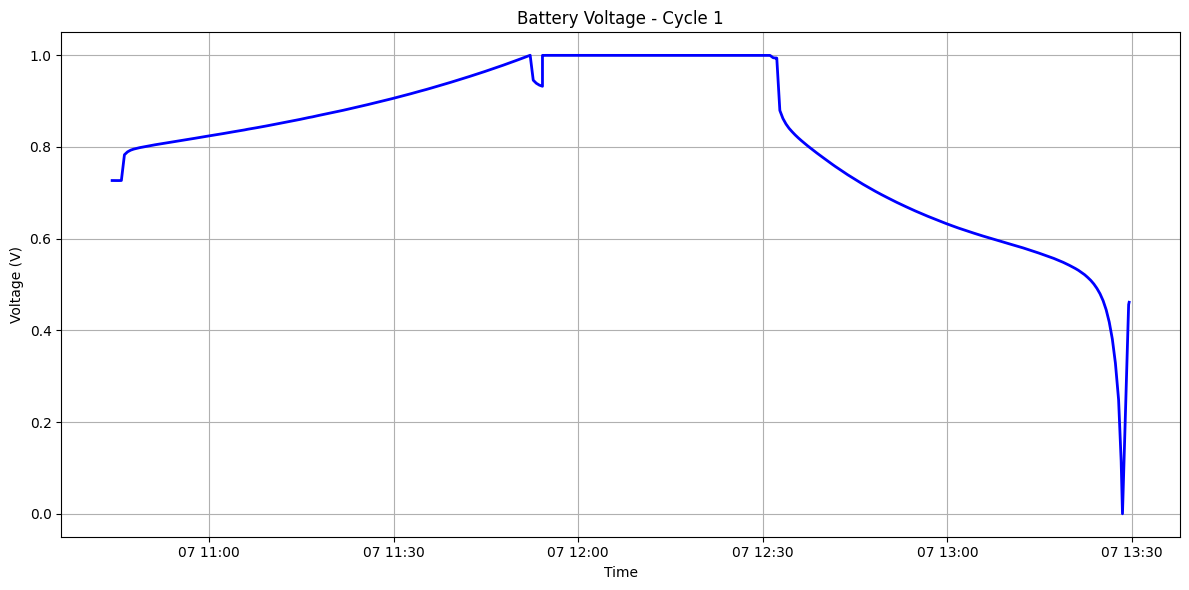

In [15]:
cycle_number = 1
cycle_df = df[df["Cycle_Index"] == cycle_number]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(cycle_df["Date_Time"], cycle_df["Voltage(V)"], color='blue', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Voltage (V)")
plt.title(f"Battery Voltage - Cycle {cycle_number}")
plt.grid(True)
plt.tight_layout()
plt.show()